In [99]:
path="/content/loan_dataset.csv"

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [101]:
df=pd.read_csv(path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
cols=["Gender","Married","Dependents","Education","Self_Employed","Loan_Amount_Term","Credit_History","Property_Area","Loan_Status"]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [104]:
# Loan_ID must be unique so check that it contain duplicate values or not
df.duplicated(["Loan_ID"]).sum()

np.int64(0)

In [105]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [106]:
print(df["Gender"].unique())
print(df["Married"].unique())
print(df["Dependents"].unique())
print(df["Self_Employed"].unique())
print(df["LoanAmount"].unique())
print(df["Loan_Amount_Term"].unique())
print(df["Credit_History"].unique())
# Get unique values to identify which to be used(replace and convert):
# Mean or Median is Numeric
# Mode is Categorical
# Around 50 rows contains missing values which is high as total rows are 614, so we replace missing data with median
# So we can't drop it is around 8% so we replcae with values

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243

In [107]:
# From above, we use:
# Mode -> Gender, Married, Dependents, Self_Employed, Credit_History
# Median -> LoanAmount
# Mean -> Loan_Amount_Term

# Mode
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"]=df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df["Credit_History"]=df["Credit_History"].fillna(df["Credit_History"].mode()[0])

# Median
df["LoanAmount"]=df["LoanAmount"].fillna(df["LoanAmount"].median())

# Mean
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())

In [108]:
# print(df["Gender"].mode())
# print(df["Gender"].mode()[0])
# print(df["LoanAmount"].median())
# print(df["Loan_Amount_Term"].mean())
# here [0] use for 1st element of mode series, while median and mean only return single values so no need to use it.

## Understand data through Visualization

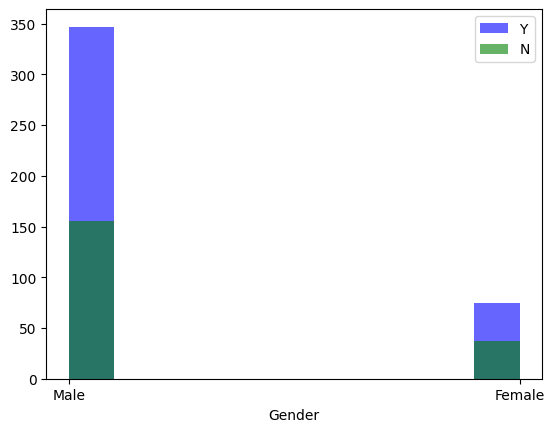

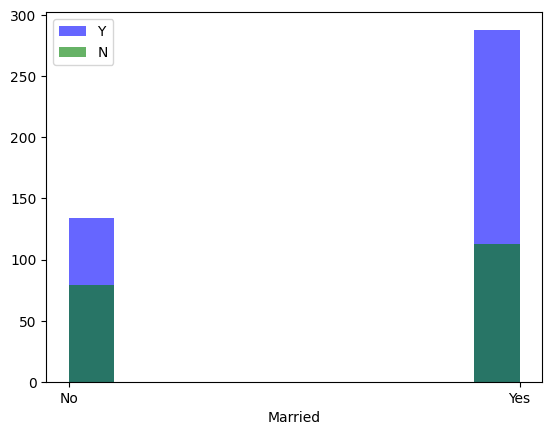

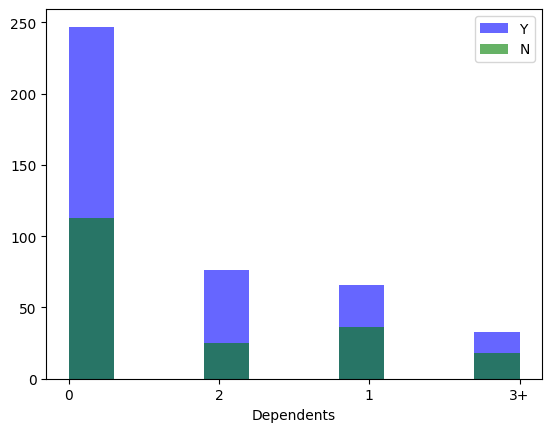

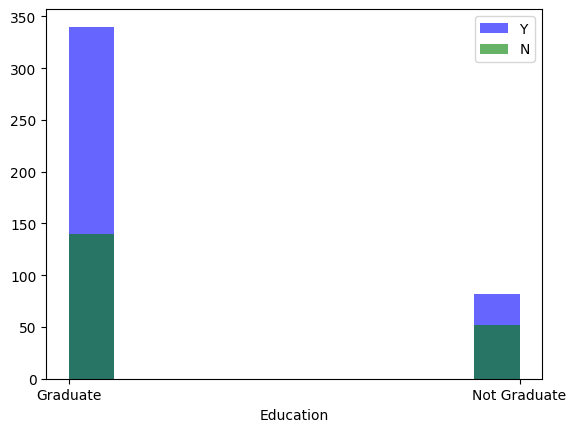

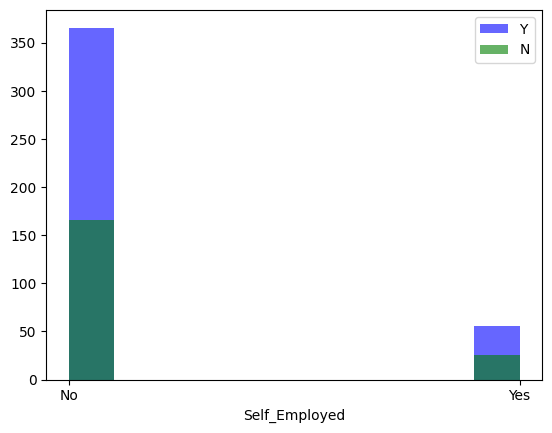

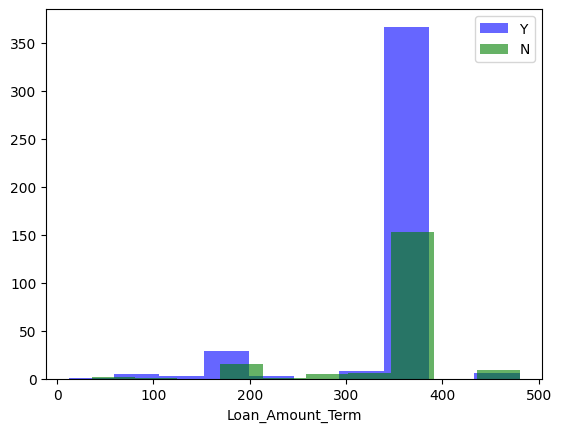

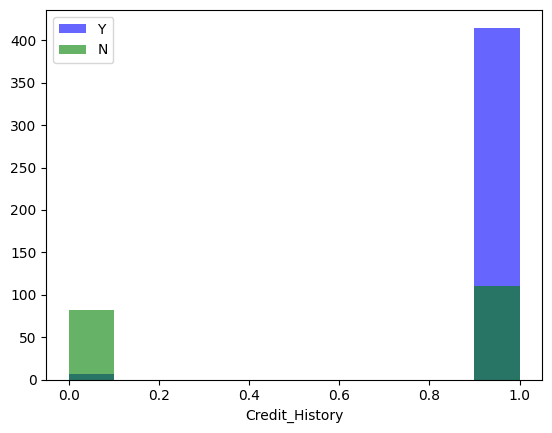

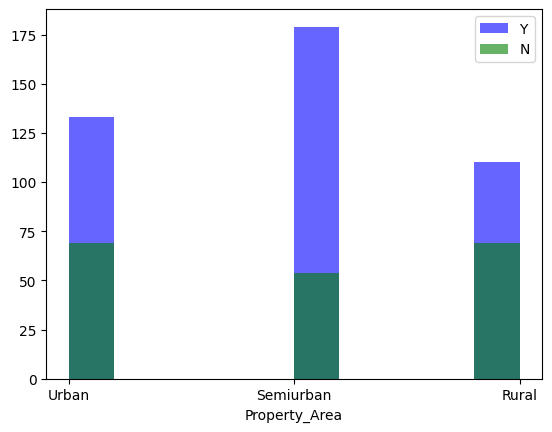

In [109]:
for label in cols[:-1]:
  plt.hist(df[df["Loan_Status"]=='Y'][label],color='blue',alpha=0.6)
  plt.hist(df[df["Loan_Status"]=='N'][label],color='green',alpha=0.6)
  plt.xlabel(label)
  plt.legend(["Y","N"])
  plt.show()

In [110]:
# Remaining Cols unique values
print(df["Education"].unique())
print(df["Property_Area"].unique())

['Graduate' 'Not Graduate']
['Urban' 'Rural' 'Semiurban']


In [111]:
# Now lets convert Categorical to numeric(both values and there type)
df["Gender"]=df["Gender"].map({"Male":0,"Female":1}).astype(int)
df["Married"]=df["Married"].map({"Yes":0,"No":1}).astype(int)
df["Dependents"]=df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3}).astype(int)
df["Education"]=df["Education"].map({"Graduate":0,"Not Graduate":1}).astype(int)
df["Self_Employed"]=df["Self_Employed"].map({"Yes":0,"No":1}).astype(int)
df["Property_Area"]=df["Property_Area"].map({"Urban":0,"Rural":1,"Semiurban":2}).astype(int)
# Target Column
df["Loan_Status"]=df["Loan_Status"].map({"Y":1,"N":0})

In [112]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,0,0,1,5849,0.0,128.0,360.0,1.0,0,1
1,LP001003,0,0,1,0,1,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0,0,0,0,0,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,0,0,1,1,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,1,0,0,1,6000,0.0,141.0,360.0,1.0,0,1


In [113]:
# Lets split data
X=df.iloc[:,2:-1] # Did not select Loan_ID and Gender
y=df["Loan_Status"]

In [130]:
X_train,y_train,X_test,y_test=X[:580],y[:580],X[580:],y[580:]

# Here target values are 0 or 1 so we will use classification
## Naive Bayes
## k-Nearest Neighbor
## Neural Networks

## 1. Naive Bayes

In [131]:
nb=GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb=nb.predict(X_test)

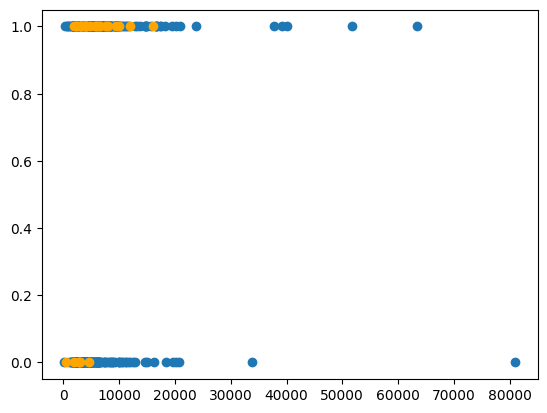

In [152]:
plt.scatter(X_train["ApplicantIncome"],y_train)
plt.scatter(X_test["ApplicantIncome"],y_pred_nb,color='orange')
plt.show()

## 2. k-Nearest Neighbor

In [132]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

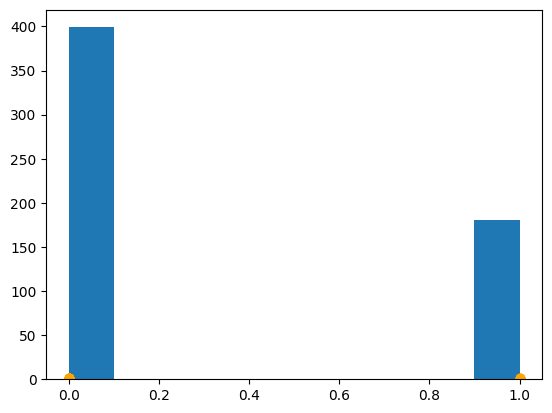

In [149]:
plt.hist(X_train["Married"][y_train])
plt.scatter(X_test["Married"],y_pred_knn,color='orange')
plt.show()

## 3. Neural Networks

In [133]:
nn=MLPClassifier()
nn.fit(X_train,y_train)
y_pred_nn=nn.predict(X_test)

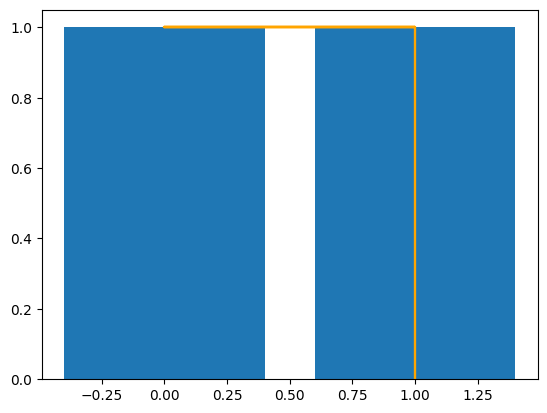

In [151]:
plt.bar(X_train["Self_Employed"],y_train)
plt.plot(X_test["Self_Employed"],y_pred_nn,color='orange')
plt.show()

In [134]:
print(f"Accuracy of Naive Bayes: {accuracy_score(y_test,y_pred_nb):.2f}")
print(f"Accuracy of k-Nearest Neighbor: {accuracy_score(y_test,y_pred_knn):.2f}")
print(f"Accuracy of Neural Networks: {accuracy_score(y_test,y_pred_nn):.2f}")

Accuracy of Naive Bayes: 0.85
Accuracy of k-Nearest Neighbor: 0.65
Accuracy of Neural Networks: 0.74
